# Personal Bank Loans Case Study

#### This can also be found on [my Git repository](https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-jul20-94Sip)


## Step 1

### Import Libraries


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


### Load the data and do initial data inspection


In [10]:
loans = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
print("Shape of loans dataset:")
loans.shape

Shape of loans dataset:


(5000, 14)

In [13]:
loans.head(10)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [14]:
print("are there any null values in the dataset?")
loans.isnull().values.any()

are there any null values in the dataset?


False

In [16]:
loans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Observations: 

#### Experience has negative values, which seems odd. I would think that Professional Experience should be >= 0. We will investigate this further later.

#### Mortgage appears to be heavily skewed

In [22]:
print('data types of each column')
loans.dtypes

data types of each column


ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

## Step 2: EDA

In [153]:
# based on the descriptive statistics, it appears there is something going on with Experience as the minimum is -3, which seems out of range

(neg_exp_rows, cols) = loans.query('Experience < 0').shape

neg_exp_pct = (neg_exp_rows/5000)*100
print(f"There are {neg_exp_rows} that have Experience < 0 which is {neg_exp_pct}% of the total rows")

There are 52 that have Experience < 0 which is 1.04% of the total rows


In [140]:
loans.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [66]:
# i'm going to use the cool new f-strings capability of python 3.6, which I read about this week
uniq_zip = loans['ZIP Code'].nunique()

print(f"number of unique zip code: {uniq_zip}")

uniq_age = loans['Age'].nunique()
print (f"number of unique ages: {uniq_age}")

(rows,cols) = loans[loans.Mortgage == 0].shape

print(f'Number of people with ZERO mortgage: {rows}')

zero_spend = len(loans.query('CCAvg <= 0.0'))

print(f'Number of people with $0 average CC spending is: {zero_spend}')

number of unique zip code: 467
number of unique ages: 45
Number of people with ZERO mortgage: 3462
Number of people with $0 average CC spending is: 106


### Univariate Analysis

In [141]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


#### Observation: based on the row count of the DataFrame and the non-null counts, there do not appear to be any missing/null values

#### starting with a bit of analysis on Education level

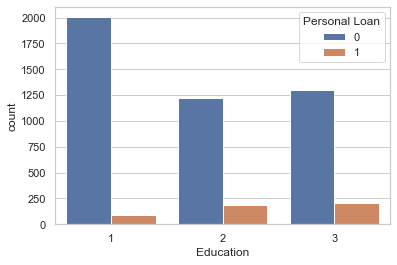

In [213]:
sns.countplot(x='Education', data = loans, hue='Personal Loan')

Distribution of Education by Personal Loan status


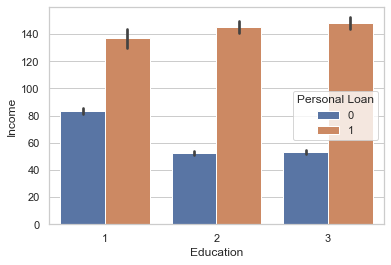

In [208]:
print("Distribution of Education by Personal Loan status")
sns.barplot(data=loans, x='Education', y='Income', hue='Personal Loan')

### Now doing a bit of analysis on the mortgage feature

In [206]:
# trying to understand the skew/unbalanced nature of the Mortgage data

#loans.query("Mortgage == 0").groupby(['Personal Loan']).Mortgage.count()
loans.query("Mortgage > 0").groupby(['Personal Loan']).Mortgage.count()

# of the 5000 rows, approx 3500 have mortgage = 0
# and of those people approx 10% take out a loan; similarly approx 13% of people with a mortgage take out a loan
# there are approx 3x the number of people that have mortgage = 0, and that is consistent with taking out a loan - people with  mortgage =0 are 3x those who have a mortgage > 0 and have taken out a loan

Personal Loan
0    1370
1     168
Name: Mortgage, dtype: int64

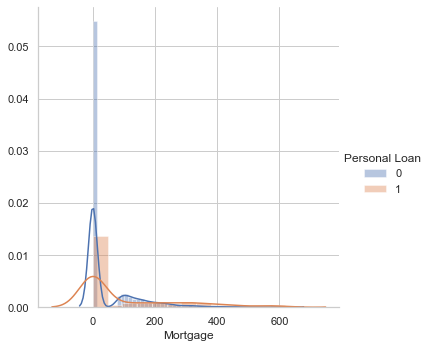

In [157]:
#sns.distplot(loans['Mortgage'])
sns.FacetGrid(loans, hue='Personal Loan', height=5).map(sns.distplot, "Mortgage").add_legend()

### Observation: Unless this is a data error, people without a mortage seem to have a high correlation with accepting a Personal Loan

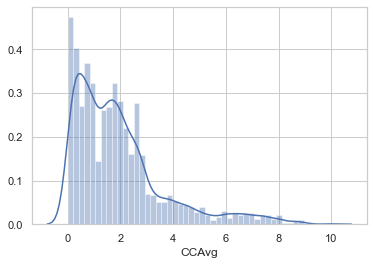

In [155]:
sns.distplot(loans['CCAvg'])

Insight on CCAvg: This is skewed as expected, with significant number of people having lower CCAvg

Distribution of Average monthly CC bill by Personal Loan status


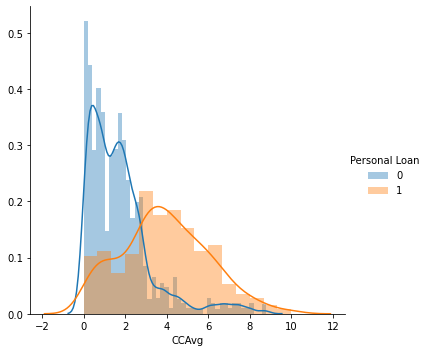

In [111]:
print("Distribution of Average monthly CC bill by Personal Loan status")
#sns.distplot(loans['CCAvg'])
sns.FacetGrid(loans, hue='Personal Loan', height=5).map(sns.distplot, "CCAvg").add_legend()

#### Observation: people with a personal loan tend to carry a higher monthly average CC bill

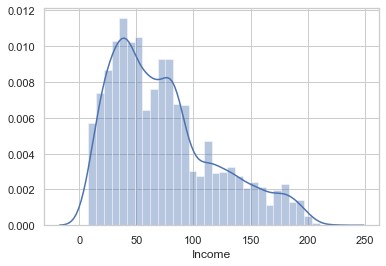

In [154]:
sns.distplot(loans['Income'])

Distribution of Income by Personal Loan status


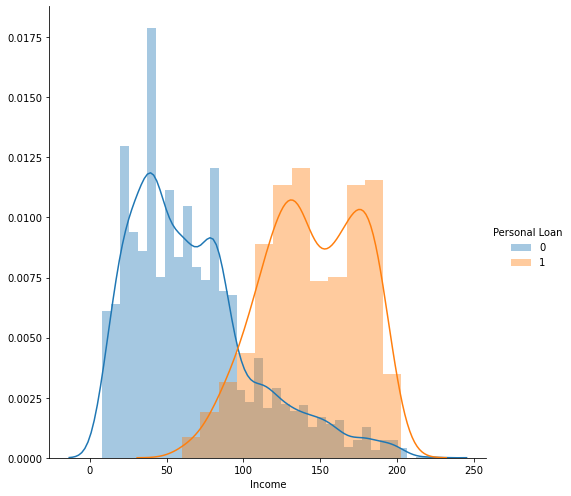

In [112]:
print("Distribution of Income by Personal Loan status")
sns.FacetGrid(loans, hue='Personal Loan', height=7).map(sns.distplot, "Income").add_legend()

#### Observation: Higher income seems to indicate taking out a Personal Loan

#### Observation: combining this with previous graphs, people with higher incomes and 0 mortgage seem to have strong correlation to taking out Personal Loan

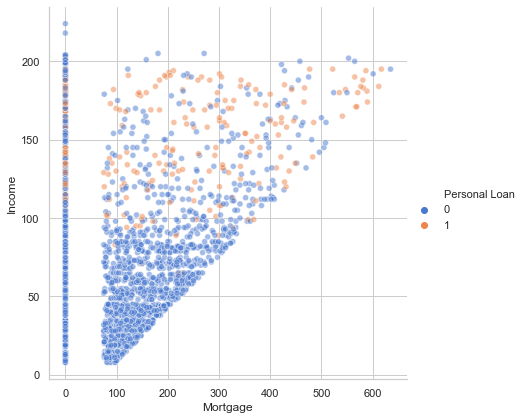

In [190]:
sns.relplot(x="Mortgage", y="Income", hue="Personal Loan",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=loans)

Distribution of Customer  years of Professional Experience


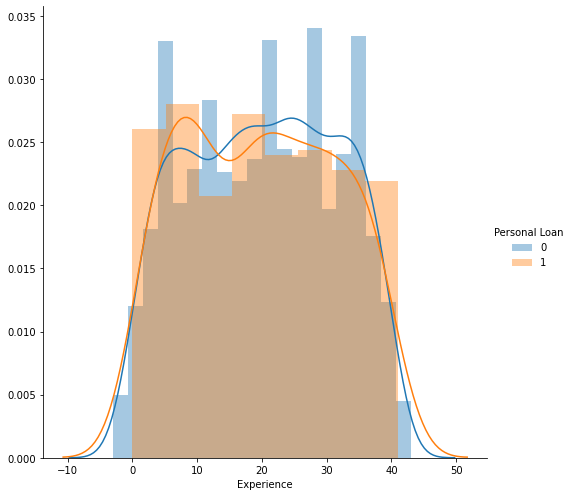

In [113]:
print("Distribution of Customer  years of Professional Experience")
#sns.distplot(loans['Experience'])
sns.FacetGrid(loans, hue='Personal Loan', height=7).map(sns.distplot, "Experience").add_legend()

Distribution of Customer Age


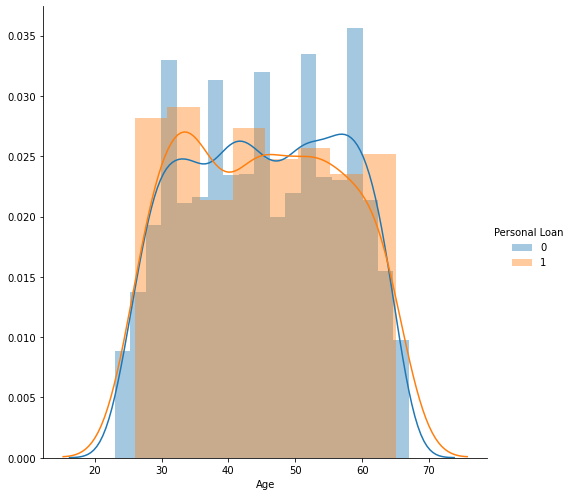

In [114]:
print("Distribution of Customer Age")
#sns.distplot(loans['Age'])
sns.FacetGrid(loans, hue='Personal Loan', height=7).map(sns.distplot, "Age").add_legend()

#### Observation: Distribution of Customer Age and Years of Professional Experience are very similar, which seems logical

Customer Education Level Histogram


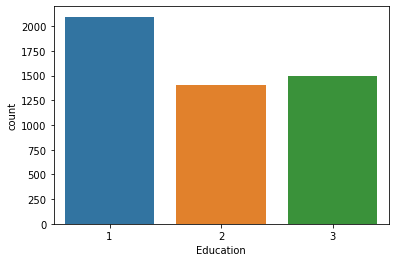

In [76]:
print("Customer Education Level Histogram")
sns.countplot(x='Education', data = loans)

### Bivariate Analysis

In [85]:
#dropping column 'ID' since this is not needed for the analysis

loans.drop(['ID'], axis=1, inplace=True)


In [143]:
loans.head(15)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [86]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

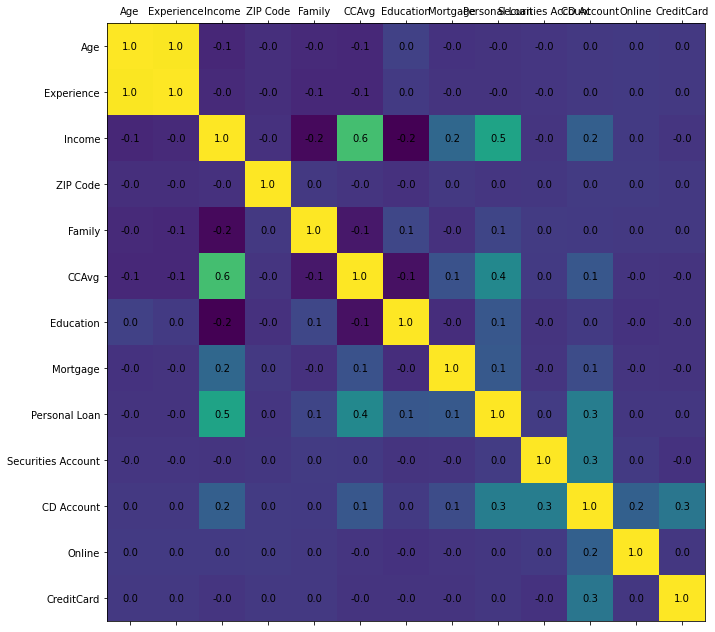

In [87]:
plot_corr(loans)

In [144]:
#dropping Zip Code - it doesn't appear to be correlated to anything
loans.drop(['ZIP Code'], axis=1, inplace=True)

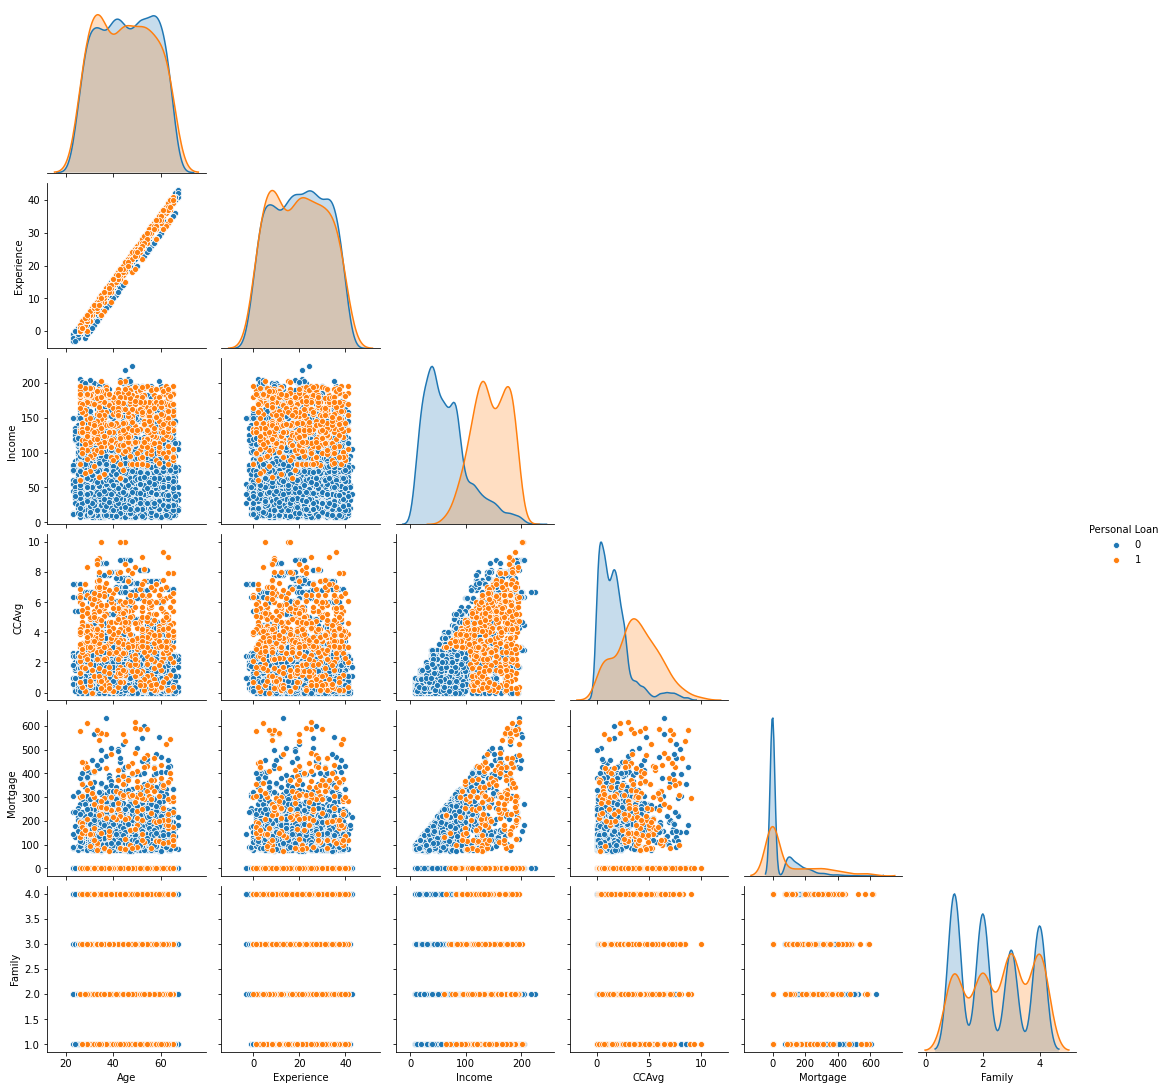

In [127]:
sns.pairplot(loans,diag_kind='kde', vars=['Age', 'Experience', 'Income','CCAvg', 'Mortgage', 'Family'], corner=True, hue='Personal Loan')

#### Observations: 

1. thru experimentation, I chose to set hue='Personal Loan', which helped me to see loans at higher income levels, which is why I went back in the earlier distplots and added hue='Personal Loan' to those
2. Regardless of family size, lower incomes due not tend to have Personal Loans

In [163]:
loans.groupby(['Personal Loan']).mean()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,45.367257,20.132301,66.237389,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [186]:
#Doing some analysis to understand relationship of categorical values to Personal Loan

#pd.crosstab(loans['Online'],loans['Personal Loan'],normalize='index')
#Online does not indicate anything of value -> ~9% of people take a Personal Loan regardless of Online account

#pd.crosstab(loans['Family'],loans['Personal Loan'],normalize='index') 
#of very little value, likelihood of PErsonal Loan marginally increases with family size

#pd.crosstab(loans['Education'],loans['Personal Loan'],normalize='index')
# KEEP: people with 2-3 years of Education are approx 3x as likely to take a personal loan

#pd.crosstab(loans['Securities Account'],loans['Personal Loan'],normalize='index')
# Securities account doesn't seem to matter

pd.crosstab(loans['CD Account'],loans['Personal Loan'],normalize='index')
#keep CD Account: people with a CD Account do NOT take out personal loans, but if they do have a CD Acct they are 6x likely to take out personal loan

#pd.crosstab(loans['CreditCard'],loans['Personal Loan'],normalize='index')
#Credit Card does not indicate anything of value -> ~9% of people take a Personal Loan regardless of Credit Card

Personal Loan,0,1
CD Account,,
0,0.927629,0.072371
1,0.536424,0.463576


### Observations from Categorical crosstab exercise:

#### CD Account appears to be predicted; as does Education

In [187]:
#dropping categorical columns that don't appear to be of much value
loans.drop(['Online'], axis=1, inplace=True)
loans.drop(['Family'], axis=1, inplace=True)
loans.drop(['Securities Account'], axis=1, inplace=True)
loans.drop(['CreditCard'], axis=1, inplace=True)

### Impute Values for negative Experience

#### After cosidering the negative Experience values, and that they are only 1% of the total of rows, I am going to consider this as mis-entered, and turn them into their positive values


In [216]:
loans['Experience'] = abs(loans.Experience)

In [217]:
loans.query('Experience < 0')

,Age,Experience,Income,CCAvg,Education,Mortgage,Personal Loan,CD Account


## 3. Split the Data into Train and Test (70/30)


In [218]:
from sklearn.model_selection import train_test_split

X = loans.drop('Personal Loan',axis=1)     # Predictor feature column
Y = loans['Personal Loan']   # Predicted variable (1=True, 0=False) 

#create dummy variables for the following categorical columns: Education, CD Account
# I have chosen to not drop the first category, based on the commentary in this link: 
# https://kiwidamien.github.io/are-you-getting-burned-by-one-hot-encoding.html

X = pd.get_dummies(X, columns=['Education', 'CD Account'], prefix=['Edu', 'CD'])


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Income,CCAvg,Mortgage,Edu_1,Edu_2,Edu_3,CD_0,CD_1
1334,47,22,35,1.3,0,1,0,0,1,0
4768,38,14,39,2.0,0,0,1,0,1,0
65,59,35,131,3.8,0,1,0,0,1,0
177,29,3,65,1.8,244,0,1,0,1,0
4489,39,13,21,0.2,0,0,1,0,1,0


## 4. Do Logistic Regression

In [242]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

# using liblinear since this is binary classification problem
model = LogisticRegression(solver="liblinear", random_state=5)

# Fit the model on train
model.fit(x_train, y_train)

LogisticRegression(random_state=5, solver='liblinear')

In [243]:
# Predicting the target variable on test data
y_predict = model.predict(x_test)

In [241]:
import sklearn
print(sklearn. __version__)

0.23.1


In [245]:
# get the coefficients

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)
print()


          0         1         2        3        4         5         6  \
0 -0.190123  0.192156  0.051747  0.18202  0.00099 -3.154488  0.795459   

          7         8         9  intercept  
0  0.865284 -1.863708  0.369963  -1.493745  

[0 1]


In [221]:
# Observe the predicted and observed classes in a dataframe.
z = x_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,Age,Experience,Income,CCAvg,Mortgage,Edu_1,Edu_2,Edu_3,CD_0,CD_1,Observed Loan Status,Predicted Loan Status
2764,31,5,84,2.9,105,0,0,1,1,0,0,0
4767,35,9,45,0.9,101,1,0,0,1,0,0,0
3814,34,9,35,1.3,0,1,0,0,1,0,0,0
3499,49,23,114,0.3,286,1,0,0,1,0,0,0
2735,36,12,70,2.6,165,0,1,0,1,0,0,0


#### Insights from Coefficients of the features:
1. As we saw with the graphs presented earlier, the 2 highest categories of Eduction (Graduate or Advanced) are the strongest predictors of people taking a Personal Loan, followed by customers having a CD Account, then marginally by years of Professional Experience.
2. The strongest features predicting an individual would not take a personal loan are, Undergrad level of education, and not having a CD Account, respectively.

In [222]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9565714285714285

Testing accuracy 0.9533333333333334

Confusion Matrix


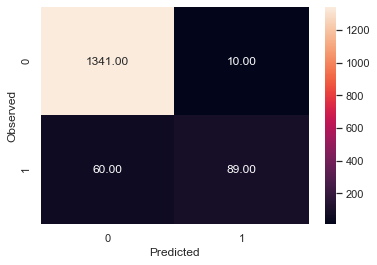

None

Recall: 0.5973154362416108

Precision: 0.898989898989899

F1 Score: 0.7177419354838711

Roc Auc Score: 0.7949567558706203


In [223]:
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

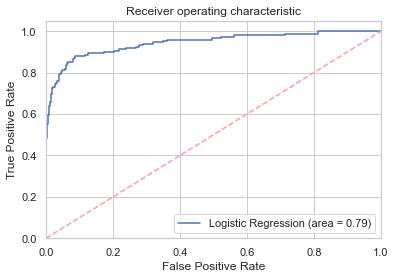

In [224]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

model_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [225]:
from math import sqrt

# function to calculate the Matthews Correlation Coefficient https://en.wikipedia.org/wiki/Matthews_correlation_coefficient
def mcc(tp, fp, tn, fn):

    x = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    return ((tp * tn) - (fp * fn)) / sqrt(x)

In [228]:
from sklearn.metrics import matthews_corrcoef
print('Matthews Correlation Coefficient:')
print('')
print(f'self-coded:  {mcc(89,10,1341,60)}')
print('')
print(f'using scikit-learn:{matthews_corrcoef(y_test,y_predict)}')

Matthews Correlation Coefficient:

self-coded:  0.7106773715084045

using scikit-learn:0.7106773715084045


### Insights about various metrics presented in this section

1. From the shape of the ROC curve, it is observable that the area under the curve (AUC) is high (0.7949).  This infers that the model is 79% effective at predicting between a person taking a Personal Loan or Not taking the loan.
2. Notice that the accuracy is 95% - this can be misleading because there could be an imbalanced dataset, with respect to Personal Loans, meaning there could be more examples of people taking a Personal Loan vs those that didn't, or vice versa. Therefore, we need to look at another metric to evaluate our model.
3. The Matthews Correlaton Coefficient: This value basically says the correlation of the True class and the Predicted class is 71%, which is good. This score helps avoid issues with class imbalance as it takes into account the True Negatives of the Confusion Matrix. Interestingly enough, this is similar to the F1 score.
4. The F1 score of 71% makes sense in this instance because the "negative class" - not taking Personal Loans, which is the case when we look at the Confusion Matrix and see 1,341 in the True Negative quadrant. MCC can be better when the value of each is similar. I found this thru this article: https://towardsdatascience.com/matthews-correlation-coefficient-when-to-use-it-and-when-to-avoid-it-310b3c923f7e

## 5. Check different parameters of Logistic Regression

In [229]:
# Checking Parameters of logistic regression
model.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 5,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [230]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    test_model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    test_model.fit(x_train, y_train) 
    y_predict = test_model.predict(x_test)     
    train_score.append(round(test_model.score(x_train, y_train),3))
    test_score.append(round(test_model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

C:\Users\natha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.957, 0.956, 0.956, 0.91, 0.907]

[0.953, 0.952, 0.953, 0.901, 0.905]


C:\Users\natha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [231]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    test_model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    test_model.fit(x_train, y_train) 
    y_predict = test_model.predict(x_test)     
    train_score.append(round(test_model.score(x_train, y_train),3))
    test_score.append(round(test_model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.957, 0.907]

[0.954, 0.905]


C:\Users\natha\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


#### Insights: liblinear and l1 gave best test accuracy, but not much different than original model

In [233]:
#now testing see impact of 'class_weight' parameter
bal_model = LogisticRegression(random_state=42,penalty='l2',solver='liblinear',class_weight='balanced') # changing class weight to balanced

bal_model.fit(x_train, y_train) 

y_predict = bal_model.predict(x_test)     

print("Trainig accuracy",bal_model.score(x_train,y_train))  
print()
print("Testing accuracy",bal_model.score(x_test, y_test))

Trainig accuracy 0.9

Testing accuracy 0.9033333333333333


#### Insight: changing from default of class_weight=None to class_weight=balanced reduced the accuracy, leave as 'none'

In [238]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    c_model = LogisticRegression(solver='liblinear', C=i)  # changing values of C
    c_model.fit(x_train, y_train) 
    y_predict = c_model.predict(x_test)     
    train_score.append(round(c_model.score(x_train,y_train),3)) 
    test_score.append(round(c_model.score(x_test, y_test),3))
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.931, 0.949, 0.954, 0.955, 0.956, 0.957]

[0.926, 0.947, 0.95, 0.953, 0.953, 0.953]


#### Insight: test accuracy did not improve beyond C=0.5

## 6. Give business understanding of your model

#### Confusion matrix translation:

True Positive (observed=1,predicted=1):

Predicted that Personal Loan will be accepted and the customer  did take loan

False Positive (observed=0,predicted=1):

Predicted that Personal loan would take a Personal Loan, but the customer declined loan

True Negative (observed=0,predicted=0):

Predicted that Personal loan will not be taken and the customer chose to not take the loan

False Negative (observed=1,predicted=0):

Predicted that Personal loan will not be taken but the customer chose to take the Personal Loan

**For this scenario, we want to increase the number of customers that will take a Personal Loan. Based on the model presented herein, we can predict, with a high degree of certainty, that Thera Bank will be successful by focusing their marketing efforts on those customers who have a Graduate or Professional/Advanced level of Education, a CD Account, and then those customers with more years of Professional Experience.

**Since Thera Bank wants to minimize marketing costs, the confusion matrix tells us that they should avoid marketing to customers with only an Undergrad degree, and those that do NOT have a CD Account. Therefore, we want to minimize False Positives, which means that Precision metric is the most important metric. This model has an 89.9% precision.